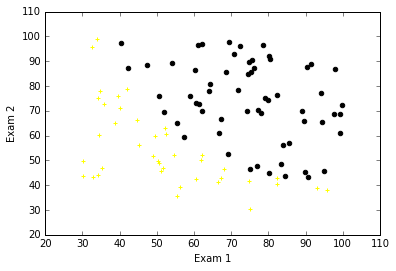

In [207]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
data=pd.read_csv("2.txt")
x1=data["Exam 1"]
x2=data["Exam 2"]
cols=data.shape[1]
y=np.array(data.iloc[:,cols-1:cols])
m=x1.size
plt.xlabel("Exam 1")
plt.ylabel("Exam 2")
for i in range(0, m):
        if y[i]==0.0:
            plt.scatter(x1[i],x2[i],marker="+",color="yellow",label="Not Admitted")
        elif y[i]==1.0:
            plt.scatter(x1[i],x2[i],color="black",label="Admitted")
plt.show()

In [194]:
x0=np.ones(m)
X=np.array([x0,x1,x2]).T
theta=np.zeros(X.shape[1])

In [195]:
def sigmoid(Z):
    return (1/(1+np.exp(-Z)))
    

In [218]:
def cost(theta,X,y):
    
    h=sigmoid(X.dot(theta))
    return ((-y * np.log(h) - (1 - y) * np.log(1 - h)).mean())
    

In [226]:
def gradient(theta, X, y):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    grad = np.zeros(theta.size)
    error = sigmoid(X * theta.T) - y
    for i in range(theta.size):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)

    return grad

In [227]:
print "the initial cost is",cost(theta,X,y)
init_grad=gradient(theta, X, y)
print "the  gradient is",init_grad

the initial cost is 0.69314718056
the  gradient is [ -0.1        -12.00921659 -11.26284221]


In [223]:
import scipy.optimize as opt  
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))  
cost(result[0],X,y)

0.20349770158947439

In [ ]:
def pred(x1,x2):
    